<a href="https://colab.research.google.com/github/stefarine/DMML2022_ROLEX/blob/main/code/UNIL_ROLEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Importation

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('training_data.csv')
df_pred = pd.read_csv('unlabelled_test_data.csv')

In [3]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [30]:
df_pred.head()
X_pred = df_pred[['sentence']]

In [4]:
np.random.seed = 0

In [5]:
y = df[['difficulty']]

Baseline

In [6]:
base_rate = (df['difficulty'].value_counts().max()/df['difficulty'].shape[0]).round(4)
base_rate

0.1694

Logistic Regression (whithout data cleaning)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


In [9]:
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1))

features = tfidf.fit_transform(df['sentence'])

features = pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names()
)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=0)

In [18]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=100, random_state=0)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(true, pred, average='macro')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [40]:
evaluate(y_test, y_pred)

TypeError: ignored

In [19]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.884375
0.4635416666666667


In [23]:
precision_log_reg = precision_score(y_test, y_pred, average='micro').round(4)
recall_log_reg = recall_score(y_test, y_pred, average='macro').round(4)
print(precision_log_reg)
print(recall_log_reg)

0.4635
0.4661


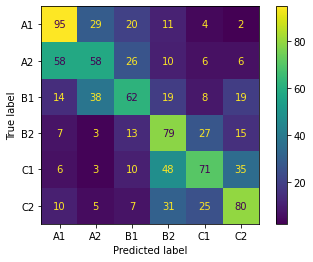

In [26]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
cm_display.plot()
plt.show()

In [32]:
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1))

hehe = tfidf.fit_transform(X_pred)

hehe = pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names()
)

AttributeError: ignored

In [31]:
log_reg.predict(X_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sentence
Feature names seen at fit time, yet now missing:
- 000
- 02h00
- 03h00
- 10
- 100
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored